# Beer Consumption

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Read dataset

In [2]:
data_path = 'dataset/Consumo_cerveja.csv'

In [3]:
raw_data = pd.read_csv(data_path)

In [4]:
raw_data

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Pre-processing

### Dropna

In [5]:
raw_data.isna().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

In [6]:
raw_data.dropna(axis=0, how='all', inplace=True)

In [7]:
raw_data.isna().sum()

Data                           0
Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
dtype: int64

### Check for zeros

In [8]:
(raw_data==0).sum()

Data                             0
Temperatura Media (C)            0
Temperatura Minima (C)           0
Temperatura Maxima (C)           0
Precipitacao (mm)                0
Final de Semana                261
Consumo de cerveja (litros)      0
dtype: int64

### Replace comma by dot

In [9]:
def real_brazilian_to_float(numeric_string):
    """Converte valores numérios no formato brasileiro 1.234,56 para float"""
    try:
        return float(numeric_string.replace(".", "").replace(",", "."))
    except:
        return numeric_string 

In [10]:
cols_to_dot = ['Temperatura Media (C)',
               'Temperatura Minima (C)',
               'Temperatura Maxima (C)',
               'Precipitacao (mm)']

In [11]:
for cols in cols_to_dot:
    raw_data[cols] = raw_data[cols].apply(real_brazilian_to_float)

### Convert 'Data' column type

In [12]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    float64
 2   Temperatura Minima (C)       365 non-null    float64
 3   Temperatura Maxima (C)       365 non-null    float64
 4   Precipitacao (mm)            365 non-null    float64
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 22.8+ KB


In [13]:
raw_data['Data'] = raw_data['Data'].astype('datetime64[ns]')

In [14]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Data                         365 non-null    datetime64[ns]
 1   Temperatura Media (C)        365 non-null    float64       
 2   Temperatura Minima (C)       365 non-null    float64       
 3   Temperatura Maxima (C)       365 non-null    float64       
 4   Precipitacao (mm)            365 non-null    float64       
 5   Final de Semana              365 non-null    float64       
 6   Consumo de cerveja (litros)  365 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 22.8 KB


**Checkpoint**

In [15]:
data_pp = raw_data.copy()

In [16]:
data_pp.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


## Graphical analysis

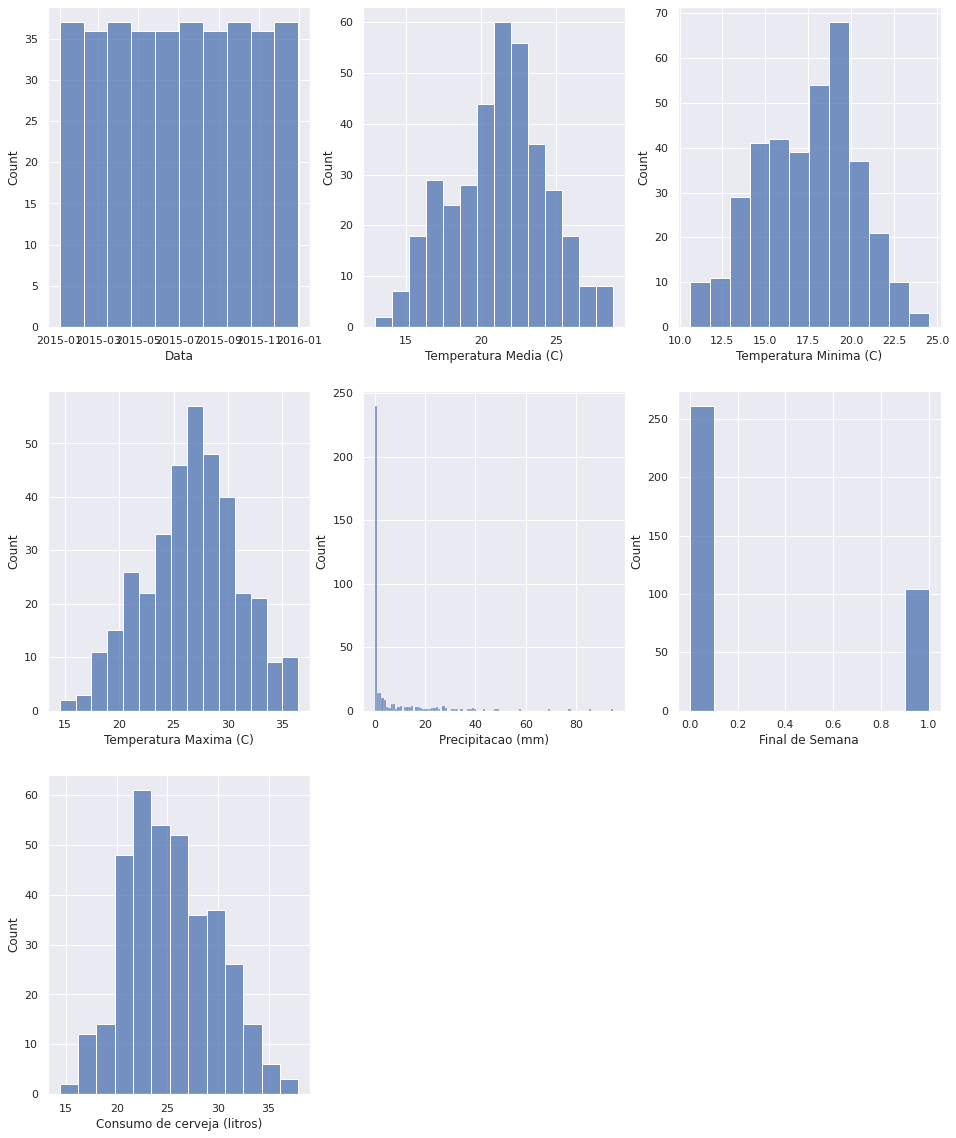

In [17]:
plt.figure(figsize=(16,20))
for i, column in enumerate(data_pp.columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(data_pp[column])

### Leading with outliers

In [18]:
q = data_pp['Precipitacao (mm)'].quantile(0.75)
# data_cleaned = data_pp[data_pp['Precipitacao (mm)']<q]
data_cleaned = data_pp

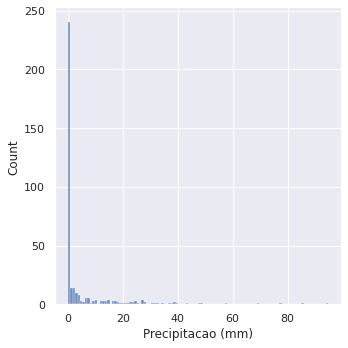

In [19]:
sns.displot(data_cleaned['Precipitacao (mm)'])

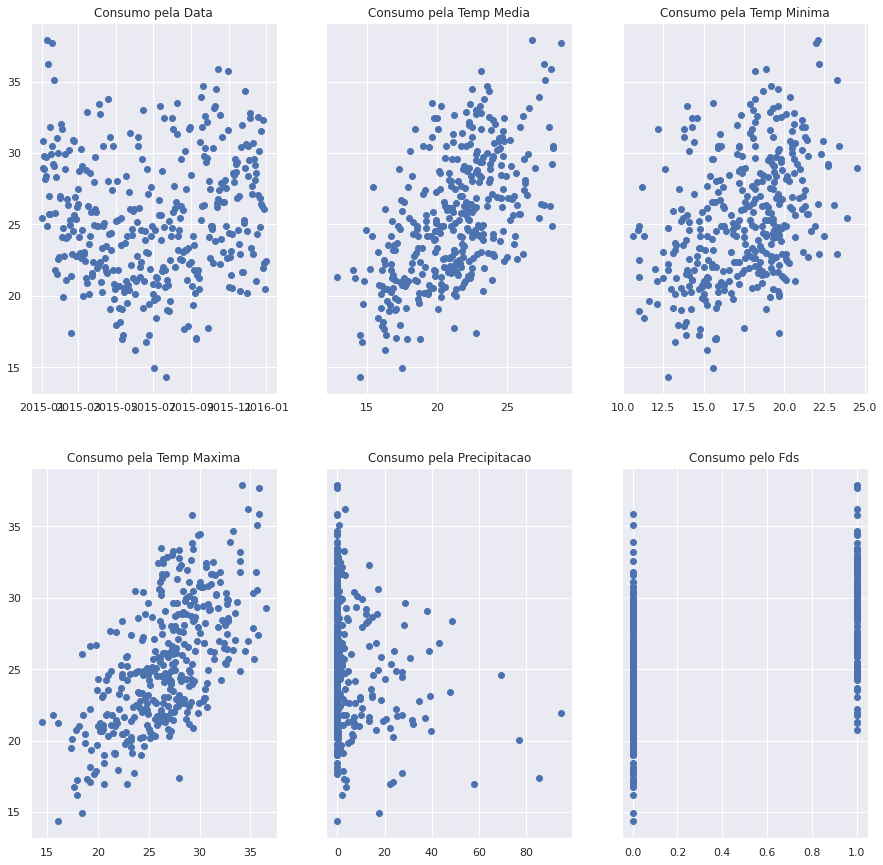

In [20]:
f, axs = plt.subplots(2, 3, sharey=True, figsize =(15,15))
axs[0,0].scatter(data_cleaned['Data'],data_cleaned['Consumo de cerveja (litros)'])
axs[0,0].set_title('Consumo pela Data')
axs[0,1].scatter(data_cleaned['Temperatura Media (C)'],data_cleaned['Consumo de cerveja (litros)'])
axs[0,1].set_title('Consumo pela Temp Media')
axs[0,2].scatter(data_cleaned['Temperatura Minima (C)'],data_cleaned['Consumo de cerveja (litros)'])
axs[0,2].set_title('Consumo pela Temp Minima')
axs[1,0].scatter(data_cleaned['Temperatura Maxima (C)'],data_cleaned['Consumo de cerveja (litros)'])
axs[1,0].set_title('Consumo pela Temp Maxima')
axs[1,1].scatter(data_cleaned['Precipitacao (mm)'],data_cleaned['Consumo de cerveja (litros)'])
axs[1,1].set_title('Consumo pela Precipitacao')
axs[1,2].scatter(data_cleaned['Final de Semana'],data_cleaned['Consumo de cerveja (litros)'])
axs[1,2].set_title('Consumo pelo Fds')


plt.show()

## Standardizing/Normalizing

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data_to_stand = data_cleaned.iloc[:,1:]
data_stand = scaler.fit_transform(data_to_stand)

In [22]:
df_stand = pd.DataFrame(data_stand, columns=data_to_stand.columns.tolist())

In [23]:
df_stand.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,1.912508,2.281333,1.365781,-0.419062,-0.631243,0.013574
1,1.824340,2.493924,1.597722,-0.419062,-0.631243,0.812780
2,1.131590,1.749853,0.762735,-0.419062,1.584177,1.232072
3,0.867085,1.430966,0.461212,-0.322294,1.584177,1.001029
4,0.816703,1.253806,0.391630,-0.419062,-0.631243,0.796390


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_to_norm = data_cleaned.iloc[:,1:]
data_norm = scaler.fit_transform(data_to_norm)

In [25]:
df_norm = pd.DataFrame(data_norm, columns=data_to_norm.columns.tolist())

In [26]:
df_norm.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,0.902256,0.956835,0.818182,0.000000,0.0,0.471221
1,0.884712,1.000000,0.863636,0.000000,0.0,0.620031
2,0.746867,0.848921,0.700000,0.000000,1.0,0.698101
3,0.694236,0.784173,0.640909,0.012658,1.0,0.655082
4,0.684211,0.748201,0.627273,0.000000,0.0,0.616979


**Checkpoint**

In [27]:
df = df_norm

In [28]:
df.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,0.521702,0.493624,0.550523,0.054818,0.284932,0.468694
std,0.199255,0.203323,0.196244,0.130990,0.452001,0.186452
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.383459,0.338129,0.422727,0.000000,0.000000,0.324871
50%,0.531328,0.525180,0.563636,0.000000,0.000000,0.446046
75%,0.650376,0.647482,0.677273,0.033755,1.000000,0.605578
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


---

## KNN Regressor implementation

#### Importing libraries

In [29]:
import scipy.spatial
from sklearn.model_selection import train_test_split

#### Declare the dependent and independent variables

In [30]:
data_cols = ['Temperatura Media (C)',
             'Temperatura Minima (C)',
             'Temperatura Maxima (C)',
             'Precipitacao (mm)', 
             'Final de Semana']

In [31]:
X = df[data_cols].values
y = list(df['Consumo de cerveja (litros)'])

#### Split data in training and test data

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

#### The KNN class

In [33]:
# https://medium.com/analytics-vidhya/implementing-k-nearest-neighbours-knn-without-using-scikit-learn-3905b4decc3c
class KNN:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def mean_distance(self, X1, X2):
        distance = scipy.spatial.distance.euclidean(X1, X2)
    
    def predict(self, X_test):
        final_output = []
        for i in range(len(X_test)):
            d = []
            votes = []
            for j in range(len(X_train)):
                dist = scipy.spatial.distance.euclidean(X_train[j] , X_test[i])
                d.append([dist, j])
            d.sort()
            d = d[0:self.k]
            sumk = 0.0
            for d, j in d:
                sumk += y_train[j]
            meank = round(sumk/self.k, 3)
            final_output.append(meank)
        return final_output
    
    def mse(self, X_test, y_test):
        predictions = self.predict(X_test)
        sum_square = 0.0
        n = len(X_test)
        for i in range(n):
            sum_square += (y_test[i] - predictions[i])**2
        mean_square = sum_square/n
        return mean_square
    
    def df_comp(self):
        comp = pd.DataFrame()
        comp['Previsão'] = prediction
        comp['Observado'] = y_test
        return comp

#### Testing the algorithm

In [34]:
beer = KNN(9)
beer.fit(X_train, y_train)
prediction = beer.predict(X_test)

# for i in range(len(prediction)):
#     print(f"Previsão: {prediction[i]}. Observado: {y_test[i]}")

In [35]:
beer.mse(X_test, y_test)

0.011643103625496509

In [36]:
beer.df_comp().head()

,Previsão,Observado
0,0.484,0.478808
1,0.546,0.733746
2,0.548,0.660973
3,0.348,0.264135
4,0.608,0.504281


### K-neighbors analysis

In [37]:
len(X_train)

255

In [38]:
df_ks = pd.DataFrame()
mse_ks = []
ks = []
n_k = 200
for k in range(1, n_k):
    beer = KNN(k)
    mse_k = beer.mse(X_test, y_test)
    mse_ks.append(mse_k)
    ks.append(k)
df_ks['k-neigbors'] = ks
df_ks['MSE'] = mse_ks

In [39]:
df_ks.describe()

,k-neigbors,MSE
count,199.000000,199.000000
mean,100.000000,0.021561
std,57.590508,0.006247
min,1.000000,0.011643
25%,50.500000,0.016431
50%,100.000000,0.020572
75%,149.500000,0.026652
max,199.000000,0.032909


K neighbors that yield smallest mse

In [40]:
min_mse = df_ks['MSE'].min()
df_ks[df_ks['MSE']==min_mse]

,k-neigbors,MSE
8,9,0.011643


<AxesSubplot:xlabel='k-neigbors', ylabel='MSE'>

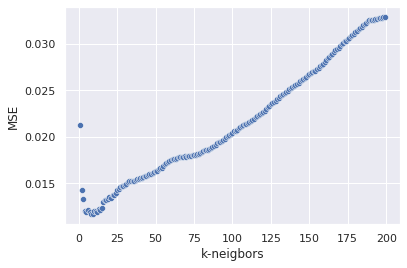

In [41]:
x_axis = df_ks['k-neigbors']
y_axis = df_ks['MSE']

sns.scatterplot(x=x_axis, y=y_axis)

<AxesSubplot:xlabel='k-neigbors', ylabel='MSE'>

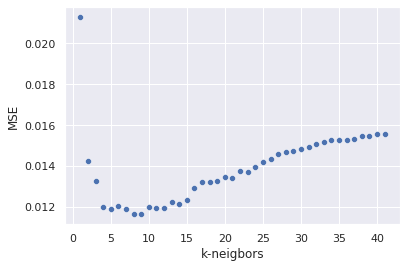

In [42]:
n_linhas = 40
x_axis = df_ks['k-neigbors'].loc[:n_linhas]
y_axis = df_ks['MSE'].loc[:n_linhas]

sns.scatterplot(x=x_axis, y=y_axis)

---

## K-means

### Import libraries

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### The Elbow Method

In [44]:
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

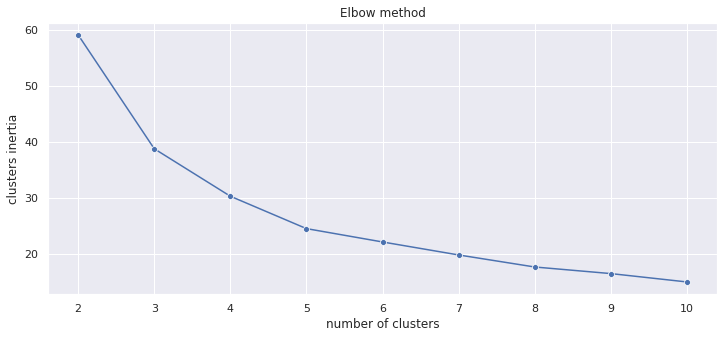

In [45]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=n_clusters, y=clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")

plt.show()

### Clustering results

In [46]:
Kmean = KMeans(n_clusters=3)
Kmean.fit(df)

KMeans(n_clusters=3)

In [47]:
Kmean.cluster_centers_

array([[5.05687295e-01, 4.74474267e-01, 5.38024476e-01, 5.51464622e-02,
        1.00000000e+00, 6.17941899e-01],
       [6.70890513e-01, 6.36363636e-01, 6.88397966e-01, 6.20002361e-02,
        2.22044605e-16, 4.98339924e-01],
       [3.55018903e-01, 3.37519815e-01, 3.94453005e-01, 4.58235000e-02,
        1.66533454e-16, 3.01226755e-01]])

In [48]:
identified_clusters = Kmean.labels_
identified_clusters

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0, 2, 2, 1, 1, 1, 0, 0,
       1, 1, 1, 2, 2, 0, 0, 1, 2, 2, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 1,
       1, 2, 1, 1, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 0,
       0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0,
       1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 2, 1, 1, 2, 1, 0, 0, 2, 2, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 2, 1, 1, 2, 1, 0, 0, 1, 1, 2,

In [49]:
data_with_cluster = df.copy()
data_with_cluster['Cluster'] = identified_clusters
data_with_cluster.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Cluster
0,0.902256,0.956835,0.818182,0.000000,0.0,0.471221,1
1,0.884712,1.000000,0.863636,0.000000,0.0,0.620031,1
2,0.746867,0.848921,0.700000,0.000000,1.0,0.698101,0
3,0.694236,0.784173,0.640909,0.012658,1.0,0.655082,0
4,0.684211,0.748201,0.627273,0.000000,0.0,0.616979,1


---